In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Galle_Production.csv')

In [3]:
df.head()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,1/1/2016,3684849.0,40.7,7,NaN,215.20
1,2/1/2016,3228301.0,250.1,10,NaN,191.45
2,3/1/2016,3194042.0,39.4,5,NaN,564.15
3,4/1/2016,3370155.0,76.0,10,NaN,280.50
4,5/1/2016,3916009.0,440.8,24,NaN,715.79


In [4]:
df.tail()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
79,8/1/2022,3003573.0,184.4,14,NaN,1463.90
80,9/1/2022,2957228.0,74.6,15,NaN,1325.81
81,10/1/2022,2737942.0,749.9,25,NaN,1581.84
82,11/1/2022,3213092.0,162.3,14,NaN,1557.84
83,12/1/2022,2986014.0,190.4,13,NaN,2200.69


In [5]:
df.shape

(84, 6)

In [6]:
import numpy as np

In [7]:
df.columns


Index(['Month', 'Production/kg', 'Rainfall in mm', 'Rainy days nos',
       'Sunshine hours', 'Fertilizer'],
      dtype='object')

In [8]:
df.dtypes

Month              object
Production/kg     float64
Rainfall in mm    float64
Rainy days nos      int64
Sunshine hours    float64
Fertilizer        float64
dtype: object

In [9]:
df["Fertilizer"].mean()

2025.4810144927537

In [10]:
df["Sunshine hours"].mean()

181.9922916666667

In [11]:
df1=df.fillna(df["Sunshine hours"].mean())

In [12]:
df2=df1.fillna(df["Fertilizer"].mean())

In [13]:
df2.describe()

,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,3.458864e+06,205.582143,15.357143,181.992292,1696.286600
std,5.315753e+05,154.643355,6.281821,29.260095,1369.695307
min,1.449728e+06,11.000000,4.000000,100.700000,49.920000
25%,3.150464e+06,102.700000,10.000000,181.992292,499.647500
50%,3.455308e+06,163.600000,15.000000,181.992292,1497.090000
75%,3.845496e+06,260.200000,20.000000,195.275000,2621.920000
max,4.735184e+06,749.900000,27.000000,245.600000,5591.340000


In [14]:
data_train=df2.sample(frac=0.9,random_state=786)

In [15]:
data_train.shape

(76, 6)

In [16]:
data_train.head()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
37,2/1/2019,3167958.0,120.7,9,202.200000,1943.750000
82,11/1/2022,3213092.0,162.3,14,181.992292,1557.840000
44,9/1/2019,3560846.0,592.6,24,108.100000,181.992292
77,6/1/2022,3108269.0,192.7,22,137.000000,1091.930000
13,2/1/2017,2817765.0,37.2,5,198.500000,1647.170000


In [17]:
data_test=df2.drop(data_train.index)

In [18]:
data_test.shape

(8, 6)

In [19]:
data_test.head()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
18,7/1/2017,3931296.0,137.3,17,210.800000,2257.67
20,9/1/2017,4175466.0,239.0,19,181.992292,2681.20
22,11/1/2017,3883546.0,549.2,19,129.200000,1794.68
23,12/1/2017,3842724.0,75.0,13,194.000000,1573.18
30,7/1/2018,3694524.0,132.2,15,182.600000,2337.69


## rest index

In [20]:
data_train.reset_index(drop=True,inplace=True)

In [21]:
data_train.head()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,2/1/2019,3167958.0,120.7,9,202.200000,1943.750000
1,11/1/2022,3213092.0,162.3,14,181.992292,1557.840000
2,9/1/2019,3560846.0,592.6,24,108.100000,181.992292
3,6/1/2022,3108269.0,192.7,22,137.000000,1091.930000
4,2/1/2017,2817765.0,37.2,5,198.500000,1647.170000


In [22]:
data_test.reset_index(drop=True,inplace=True)

In [23]:
data_test.head()

,Month,Production/kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,7/1/2017,3931296.0,137.3,17,210.800000,2257.67
1,9/1/2017,4175466.0,239.0,19,181.992292,2681.20
2,11/1/2017,3883546.0,549.2,19,129.200000,1794.68
3,12/1/2017,3842724.0,75.0,13,194.000000,1573.18
4,7/1/2018,3694524.0,132.2,15,182.600000,2337.69


In [24]:
from pycaret.regression import *

In [25]:
reg=setup(data=data_train,target="Production/kg",session_id=123)

,Description,Value
0,Session id,123
1,Target,Production/kg
2,Target type,Regression
3,Original data shape,"(76, 6)"
4,Transformed data shape,"(76, 6)"
5,Transformed train set shape,"(53, 6)"
6,Transformed test set shape,"(23, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [82]:
best=compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,410854.6558,313382334931.6662,531389.9159,-0.2835,0.1671,0.1368,0.0420
ada,AdaBoost Regressor,424438.9159,313814109651.9662,532989.2014,-0.2900,0.1674,0.1406,0.0270
huber,Huber Regressor,421327.9143,315418700275.9951,533083.9085,-0.2995,0.1682,0.1409,0.0200
et,Extra Trees Regressor,427040.1142,320448895995.9512,537533.1211,-0.3106,0.1688,0.1417,0.0400
dt,Decision Tree Regressor,429197.5417,312361664688.9209,533938.6260,-0.3158,0.1673,0.1410,0.0330
lar,Least Angle Regression,427601.5333,321351065023.3203,539529.4990,-0.3242,0.1695,0.1420,0.0160
br,Bayesian Ridge,427601.5333,321351065023.3200,539529.4990,-0.3242,0.1695,0.1420,0.0230
omp,Orthogonal Matching Pursuit,427601.5333,321351065023.3204,539529.4990,-0.3242,0.1695,0.1420,0.0190
llar,Lasso Least Angle Regression,427601.5333,321351065023.3209,539529.4990,-0.3242,0.1695,0.1420,0.0270
en,Elastic Net,427601.5333,321351065023.3204,539529.4990,-0.3242,0.1695,0.1420,0.0130


In [26]:
ada=create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,467230.5722,316873454995.8017,562915.1401,-0.3760,0.1830,0.1626
1,319384.6667,193306342459.0000,439666.1716,-0.0156,0.1214,0.0892
2,235359.6667,78103227989.5734,279469.5475,-0.0114,0.0828,0.0697
3,442203.4250,341175690434.0406,584102.4657,-1.1524,0.2026,0.1706
4,476988.1824,273951296971.7660,523403.5699,-0.3632,0.1471,0.1302
5,351993.0857,217124154426.7837,465965.8297,-0.5389,0.1241,0.0892
6,382553.5318,246446015929.3434,496433.2945,-0.0934,0.1355,0.1010
7,440110.6000,343819980513.4000,586361.6465,-0.2300,0.1547,0.1143
8,728715.8444,960473591026.5605,980037.5457,-0.0354,0.4005,0.3581


In [28]:
tuned_ada=tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,463677.1012,314053029540.3658,560404.3447,-0.3638,0.1821,0.1612
1,320784.1481,197886137128.9383,444843.9469,-0.0397,0.1225,0.0888
2,235315.5333,77727400480.8400,278796.3423,-0.0065,0.0826,0.0698
3,443537.3600,343081027996.4801,585731.1909,-1.1644,0.2031,0.1711
4,477888.0222,275259214832.9864,524651.5175,-0.3697,0.1475,0.1305
5,362125.2000,234385305156.9778,484133.5613,-0.6613,0.1294,0.0914
6,391024.3556,266054851516.8050,515805.0519,-0.1804,0.1410,0.1028
7,447020.9800,349188064928.1220,590921.3695,-0.2492,0.1559,0.1160
8,732847.6000,953409818235.2000,976427.0675,-0.0278,0.3987,0.3572


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


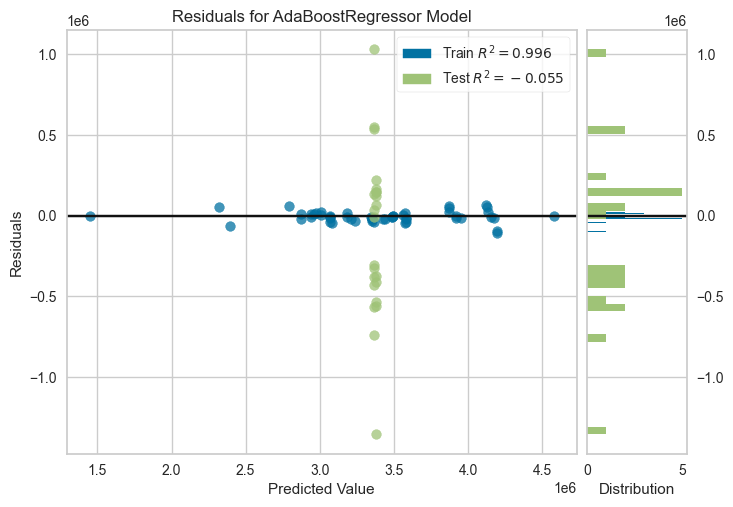

In [29]:
plot_model(tuned_ada)

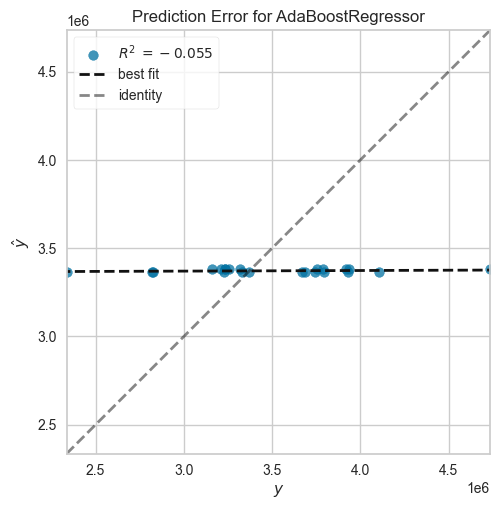

In [86]:
plot_model(tuned_ada,plot="error")

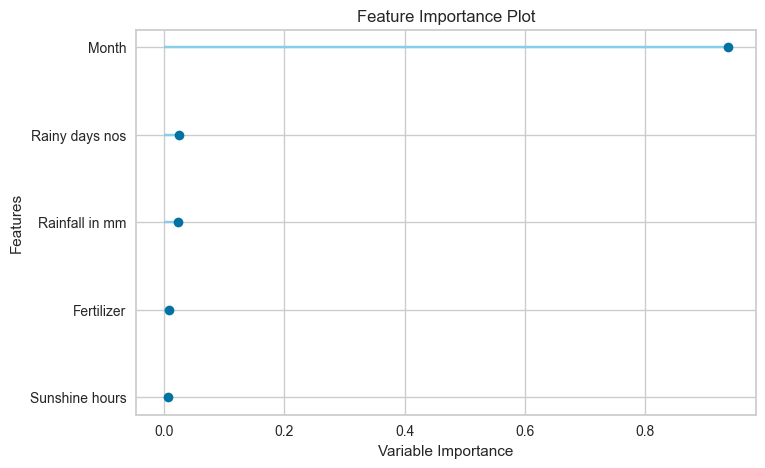

In [87]:
plot_model(tuned_ada,plot="feature")

In [30]:
predict_model(tuned_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,396944.0672,258013160445.0929,507949.9586,-0.0552,0.1471,0.1144


,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/kg,prediction_label
53,2/1/2020,27.400000,5,229.500000,1776.900024,2335177.0,3.363487e+06
64,12/1/2016,63.400002,12,181.992294,181.992294,3927730.0,3.363487e+06
69,6/1/2016,119.099998,19,181.992294,516.530029,3741676.0,3.363487e+06
4,2/1/2017,37.200001,5,198.500000,1647.170044,2817765.0,3.363487e+06
60,11/1/2019,309.399994,19,181.992294,181.992294,3232376.5,3.380710e+06
23,1/1/2017,225.100006,8,210.500000,1300.250000,3234602.0,3.380710e+06
29,5/1/2022,505.799988,26,117.000000,949.619995,3316929.0,3.380710e+06
61,1/1/2022,72.900002,8,241.000000,1120.729980,2825391.0,3.363487e+06
8,1/1/2019,27.700001,5,188.500000,2029.130005,3330669.5,3.363487e+06
73,5/1/2016,440.799988,24,181.992294,715.789978,3916009.0,3.380710e+06


In [31]:
test_pred=predict_model(tuned_ada,data=data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,467768.2386,249271763579.3874,499271.2325,-0.7757,0.1381,0.1239


In [32]:
test_pred.head()

,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/kg,prediction_label
0,7/1/2017,137.300003,17,210.800003,2257.669922,3931296.0,3.363487e+06
1,9/1/2017,239.000000,19,181.992294,2681.199951,4175466.0,3.380710e+06
2,11/1/2017,549.200012,19,129.199997,1794.680054,3883546.0,3.380710e+06
3,12/1/2017,75.000000,13,194.000000,1573.180054,3842724.0,3.363487e+06
4,7/1/2018,132.199997,15,182.600006,2337.689941,3694524.0,3.363487e+06


In [33]:
save_model(tuned_ada,"Regression Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rainfall in mm', 'Rainy days nos',
                                              'Sunshine hours', 'Fertilizer'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Month'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Month'],
                                     transformer=TargetEncoder(cols=['Month'],
                                                               handle_missing='return_nan'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', AdaBoostRegressor(random_state=123))]),
 'Regression Model.pkl')

In [34]:
save_final_model=load_model("Regression Model")

Transformation Pipeline and Model Successfully Loaded


In [35]:
new_prediction=predict_model(save_final_model,data=data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,467768.2386,249271763579.3874,499271.2325,-0.7757,0.1381,0.1239


In [95]:
new_prediction.head()

,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/kg,prediction_label
0,2017-07-01,137.300003,17.0,210.800003,2257.669922,3931296.0,3.363487e+06
1,2017-09-01,239.000000,19.0,181.992294,2681.199951,4175466.0,3.380710e+06
2,2017-11-01,549.200012,19.0,129.199997,1794.680054,3883546.0,3.380710e+06
3,2017-12-01,75.000000,13.0,194.000000,1573.180054,3842724.0,3.363487e+06
4,2018-07-01,132.199997,15.0,182.600006,2337.689941,3694524.0,3.363487e+06
